In [9]:
import pandas as pd
from collections import Counter

In [41]:
df_new_filtered = pd.read_csv("Inappropriate_095_top_vs_one.csv")

In [42]:
df_new_filtered.head()

,INPUT:text,OUTPUT:result,CONFIDENCE:result
0,"только проституции, а не порно, толстяк",yes,0.9995
1,- Как Вы боритесь от навязчивых грешных мыслях...,no,0.9734
2,Куда можно пойти работать в 12 лет? очень нужн...,no,0.9991
3,"торговля людьми, оружием и наркотиками простит...",yes,0.9999
4,Новость про порно без фулла как секс без женщины,yes,0.9966


In [43]:
df_new_filtered.drop_duplicates(subset=['INPUT:text'],inplace = True)

In [44]:
df_published = pd.read_csv("../appropriateness/Appropriateness.csv")

In [45]:
non_processed_texts_new_filtered = set([txt for txt in df_new_filtered['INPUT:text'].tolist()])
len(non_processed_texts_new_filtered)

108812

In [60]:
df_published.drop_duplicates(subset=['text'],inplace = True)

In [61]:
df_published.head()

,text,inappropriate,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,...,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,human_labeled,toxic_auto
0,Начальники ДК и нынешнего места работы?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.09
1,"Читаю. Драки, грабежи, ДТП. Изредка убийства, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.18
2,"Допустимо, если информация не нарушает правил ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.02
3,В больницу при приеме на работу тоже мед комис...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
4,а зачем ты на проураинские митинги выходил? во...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.40


In [62]:
processed_texts_vers2 = set([txt for txt in df_published['text'].tolist()])
len(processed_texts_vers2)

163312

In [63]:
len(non_processed_texts_new_filtered - processed_texts_vers2)

15184

In [64]:
import re
def get_len(text):
    if len(text.split()) > 5 and len (text)< 250:
        return True
    return None
def is_mostly_russian(text):
    text = str(text)
    russian_letters_count = len(re.findall("[а-яА-Я]",text))
    eng_letters_count = len(re.findall("[a-zA-Z]",text))
    if russian_letters_count > eng_letters_count:
        return True
    return None
def depersonalize(text):
    text = str(text)
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text= re.sub(url_regex, "url", text)
    text = re.sub("id[\d]*",'',text)
    text = re.sub("> ?",'',text)
    text = re.sub("@[\w]*",'',text)
#     text = re.sub("\+[\d]*", "", text)
    text = re.sub("[\d]+", "NUMBER", text)
    text = re.sub(">>", "", text)
#     text = re.sub("[\d]{3,100}", "", text)
    text = re.sub("[\t|\n|\r]", "", text)
#     text = re.sub("[(OP)|url|nickname|phone_number]", "", text)
    return text

In [65]:
processed_texts_new_filtered = set([depersonalize(txt) for txt in non_processed_texts_new_filtered])

In [66]:
a = set([1,2,3])
b = set([2,3,4,5,])
a - b

{1}

In [67]:
len(processed_texts_new_filtered - processed_texts_vers2)

5178

In [68]:
df_new_filtered['text'] = df_new_filtered['INPUT:text'].apply(depersonalize)

In [69]:
df_new_filtered['direct_map'] = df_new_filtered['text'].isin(processed_texts_vers2)

In [70]:
Counter(df_new_filtered['direct_map'])

Counter({True: 103634, False: 5178})

# Там где не нашлись данные

In [90]:
df_new_filtered_NO_direct_data = df_new_filtered[df_new_filtered['direct_map'] == False]

In [111]:
df_new_filtered_NO_direct_data.to_csv("no_direct_data.csv",index = None)

In [94]:
# !pip install transformers

In [112]:
df_new_filtered_NO_direct_data = pd.read_csv("no_direct_data_autolabeled.csv")

In [113]:
df_new_filtered_NO_direct_data.head()

,INPUT:text,OUTPUT:result,CONFIDENCE:result,text,direct_map,onerow_multi
0,Алкоголь для быдла. Уж если начинать то с героина,yes,0.9999,Алкоголь для быдла. Уж если начинать то с героина,False,drugs
1,"Возьми лучше вместо плодовитых ещё декадентов,...",yes,0.9982,"Возьми лучше вместо плодовитых ещё декадентов,...",False,slavery
2,"В рашке у баб по закону больше прав, чем у муж...",yes,0.9999,"В рашке у баб по закону больше прав, чем у муж...",False,sexism
3,"ладнокогда тебе в очко засунут шампанское, ста...",yes,0.9995,"ладнокогда тебе в очко засунут шампанское, ста...",False,pornography
4,А про фроську - одногдазые проститутки,yes,0.9997,А про фроську - одногдазые проститутки,False,prostitution


In [118]:
# set(df_new_filtered_NO_direct_data['onerow_multi'])

In [115]:
topics = ['offline_crime', 'online_crime', 'drugs', 'gambling', 'pornography',
       'prostitution', 'slavery', 'suicide', 'terrorism', 'weapons',
       'body_shaming', 'health_shaming', 'politics', 'racism', 'religion',
       'sexual_minorities', 'sexism', 'social_injustice']

In [121]:
data_append = []
for  _,el in df_new_filtered_NO_direct_data.iterrows():
    current_topic_list = [0]*len(topics)
    current_topic_list.extend([0,0])
    current_elemen_topics = el['onerow_multi'].split(',')
    for t in current_elemen_topics:
        if t == 'none': continue
        current_topic_list[topics.index(t)] = 1
    data_append.append(current_topic_list)

In [122]:
data_append[:2]

[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [123]:
df_append = pd.DataFrame(data = data_append, columns = topics + ['human_labeled', 'toxic_auto'])

In [124]:
df_append.head()

,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,human_labeled,toxic_auto
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
df_new_filtered_NO_direct_data = pd.concat([df_new_filtered_NO_direct_data,df_append], axis = 1)

In [126]:
df_new_filtered_NO_direct_data.head()

,INPUT:text,OUTPUT:result,CONFIDENCE:result,text,direct_map,onerow_multi,offline_crime,online_crime,drugs,gambling,...,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,human_labeled,toxic_auto
0,Алкоголь для быдла. Уж если начинать то с героина,yes,0.9999,Алкоголь для быдла. Уж если начинать то с героина,False,drugs,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Возьми лучше вместо плодовитых ещё декадентов,...",yes,0.9982,"Возьми лучше вместо плодовитых ещё декадентов,...",False,slavery,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"В рашке у баб по закону больше прав, чем у муж...",yes,0.9999,"В рашке у баб по закону больше прав, чем у муж...",False,sexism,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,"ладнокогда тебе в очко засунут шампанское, ста...",yes,0.9995,"ладнокогда тебе в очко засунут шампанское, ста...",False,pornography,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,А про фроську - одногдазые проститутки,yes,0.9997,А про фроську - одногдазые проститутки,False,prostitution,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Там где есть просто мапящиеся метаданные

In [71]:
df_new_filtered_with_direct_data = df_new_filtered[df_new_filtered['direct_map'] == True]

In [72]:
df_new_filtered_with_direct_data.head()

,INPUT:text,OUTPUT:result,CONFIDENCE:result,text,direct_map
0,"только проституции, а не порно, толстяк",yes,0.9995,"только проституции, а не порно, толстяк",True
1,- Как Вы боритесь от навязчивых грешных мыслях...,no,0.9734,- Как Вы боритесь от навязчивых грешных мыслях...,True
2,Куда можно пойти работать в 12 лет? очень нужн...,no,0.9991,Куда можно пойти работать в NUMBER лет? очень ...,True
3,"торговля людьми, оружием и наркотиками простит...",yes,0.9999,"торговля людьми, оружием и наркотиками простит...",True
4,Новость про порно без фулла как секс без женщины,yes,0.9966,Новость про порно без фулла как секс без женщины,True


In [73]:
df_new_filtered_with_direct_data_merged = df_new_filtered_with_direct_data.merge(df_published, how = 'left',on = 'text')

In [74]:
len(df_new_filtered_with_direct_data_merged)

103634

In [114]:
df_new_filtered_with_direct_data_merged.columns

Index(['INPUT:text', 'OUTPUT:result', 'CONFIDENCE:result', 'text',
       'direct_map', 'inappropriate', 'offline_crime', 'online_crime', 'drugs',
       'gambling', 'pornography', 'prostitution', 'slavery', 'suicide',
       'terrorism', 'weapons', 'body_shaming', 'health_shaming', 'politics',
       'racism', 'religion', 'sexual_minorities', 'sexism', 'social_injustice',
       'human_labeled', 'toxic_auto'],
      dtype='object')

In [132]:
df_new_filtered_with_direct_data_merged.sample(10)

,INPUT:text,OUTPUT:result,CONFIDENCE:result,text,direct_map,inappropriate,offline_crime,online_crime,drugs,gambling,...,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,human_labeled,toxic_auto
32867,Только со счастливой концовкой. Где его казнят...,no,0.9924,Только со счастливой концовкой. Где его казнят...,True,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.24
26329,Суицид в молодежной среде-противоречиво написа...,no,0.9859,Суицид в молодежной среде-противоречиво написа...,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.01
20333,"Так то ж через 3 месяца произошло, а уходили -...",no,0.9928,"Так то ж через NUMBER месяца произошло, а уход...",True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
37994,Скачиваем с торрента вот здесь Скрытый текст:Д...,yes,0.9953,Скачиваем с торрента вот здесь Скрытый текст:Д...,True,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.13
4118,То есть разделения на женские и мужские дела н...,no,0.9980,То есть разделения на женские и мужские дела н...,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.01
65184,"От слов что, ""бедность - опора Путина"" так стр...",yes,0.9977,"От слов что, ""бедность - опора Путина"" так стр...",True,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.19
50246,русский мир от гниющих экономик европы и америки,yes,0.9966,русский мир от гниющих экономик европы и америки,True,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.06
32464,Кого вы бы назвали самым красивым актером в ис...,no,0.9994,Кого вы бы назвали самым красивым актером в ис...,True,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.11
47704,Гуманизм и операция по прерыванию беременности...,no,0.9701,Гуманизм и операция по прерыванию беременности...,True,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.13
50322,Да любой мало. К хорошему быстро привыкаешь.,no,0.9963,Да любой мало. К хорошему быстро привыкаешь.,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.01


# Мерджим

In [139]:
df_new_filtered_with_direct_data_merged.drop(columns=['direct_map','inappropriate'],inplace = True)

In [140]:
df_new_filtered_NO_direct_data.drop(columns=['direct_map', 'onerow_multi'],inplace = True)

In [141]:
df_new_filtered_with_direct_data_merged.columns == df_new_filtered_NO_direct_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [142]:
df_new_filtered_with_direct_data_merged.columns

Index(['INPUT:text', 'OUTPUT:result', 'CONFIDENCE:result', 'text',
       'offline_crime', 'online_crime', 'drugs', 'gambling', 'pornography',
       'prostitution', 'slavery', 'suicide', 'terrorism', 'weapons',
       'body_shaming', 'health_shaming', 'politics', 'racism', 'religion',
       'sexual_minorities', 'sexism', 'social_injustice', 'human_labeled',
       'toxic_auto'],
      dtype='object')

In [143]:
df_new_filtered_NO_direct_data.columns

Index(['INPUT:text', 'OUTPUT:result', 'CONFIDENCE:result', 'text',
       'offline_crime', 'online_crime', 'drugs', 'gambling', 'pornography',
       'prostitution', 'slavery', 'suicide', 'terrorism', 'weapons',
       'body_shaming', 'health_shaming', 'politics', 'racism', 'religion',
       'sexual_minorities', 'sexism', 'social_injustice', 'human_labeled',
       'toxic_auto'],
      dtype='object')

In [144]:
df_new_filtered_MERGED = pd.concat([df_new_filtered_with_direct_data_merged,df_new_filtered_NO_direct_data])

In [154]:
Counter(df_new_filtered_MERGED['human_labeled'])

Counter({1: 5349, 0: 103463})

In [155]:
df_new_filtered_MERGED.to_csv("Inappropriate_095_top_vs_one_with_multi.csv",index = None)

In [145]:
len(df_new_filtered_MERGED)

108812

In [98]:
# Считаем пропорции

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
df_new_filtered_MERGED =pd.read_csv("Inappropriate_095_top_vs_one_with_multi.csv")

In [11]:
topics = ['offline_crime', 'online_crime', 'drugs', 'gambling', 'pornography',
       'prostitution', 'slavery', 'suicide', 'terrorism', 'weapons',
       'body_shaming', 'health_shaming', 'politics', 'racism', 'religion',
       'sexual_minorities', 'sexism', 'social_injustice']

In [12]:
def get_count(df):
    
    def round_up(val):
        if float(val) > 0.5:
            return 1
        return 0

    df_count = pd.DataFrame()
    for c in topics:
        if c != 'text':
            df_count[c] = df[c].apply(round_up)
            
    counts = []
    names = []
    for col in df_count.columns:
        cnt = sum(df_count[col])
        counts.append(cnt)
        names.append(col)
        
    df_count_fin = pd.DataFrame({'class':names, 'count':counts})
    df_count_fin_sorted = df_count_fin.sort_values('count', ascending = False)
    return df_count_fin_sorted, len(df)

In [13]:
def plot_df(df, df_len):
    dct = {}
    for  i,d in df.iterrows():
        t,c = d
        dct[t] = c
    same_order_values = [dct[t] for t in topics]
    
        # Generate a normal distribution, center at x=0 and y=5
    x_positions = np.arange(len(topics) )
    y = same_order_values

    # We can set the number of bins with the `bins` kwarg
    plt.bar(x_positions,y, align='center', alpha=0.5)
    plt.xticks(x_positions, topics)
    plt.xticks(rotation = 85, fontsize=14)
    plt.ylabel('count per topic', fontsize=14)
    plt.title("Total сount of samples = {}".format(df_len), fontsize=14)

    plt.show()
#     plt.savefig("multi_count.pdf",format='pdf', bbox_inches='tight')

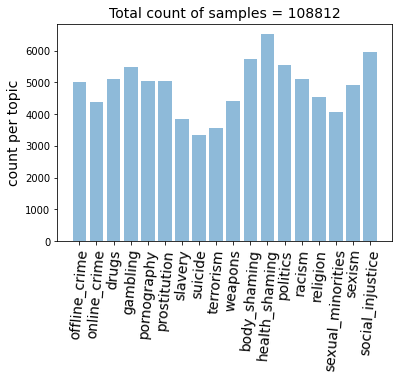

In [14]:
dfr, df_len = get_count(df_new_filtered_MERGED)
plot_df(dfr, df_len)